In [25]:
import pandas as pd
import numpy as np
import networkx as nx
import collections
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy import stats
import math

path = 'data/'

In [3]:
def read_file(path, file_name):
    df = pd.read_csv(path + file_name)
    print('df {}: {}'.format(file_name, df.shape))
    return df

In [4]:
df_m = read_file(path, 'df_merge_cc.csv')
df_m.head(2)

df df_merge_cc.csv: (2886875, 6)


,h,t,r,h_id,t_id,r_id
0,P41932,GO:0045167,hasBiologicalProcess,105518,157161,6
1,P41932,GO:0000132,hasBiologicalProcess,105518,103330,6


In [5]:
df_n = read_file(path, 'df_nodes_cc.csv')
df_n.head(2)

df df_nodes_cc.csv: (212557, 2)


,id,name
0,0,Q90275
1,1,P58004


In [6]:
lst_node_ids = df_n['id']

In [7]:
def load_graph( df, col_ids = ['h_id','t_id', 'r_id']):

    print('__check_connectivity| df : {}'.format(df.shape))
    df_edges = df[col_ids]
    edges = [tuple(x) for x in df_edges.values]
    print('__check_connectivity| edges: {}'.format(len(edges)))

    GRAPH = nx.Graph()
    GRAPH.add_weighted_edges_from(edges)
    
    return GRAPH

In [8]:
G = load_graph(df_m)

__check_connectivity| df : (2886875, 6)
__check_connectivity| edges: 2886875


In [9]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)

In [10]:
n, m = len(G.nodes), len(G.edges)
G_r = nx.gnm_random_graph(n, m)

degree_sequence_r = sorted([d for n, d in G_r.degree()], reverse=True)  # degree sequence
degreeCount_r = collections.Counter(degree_sequence_r)

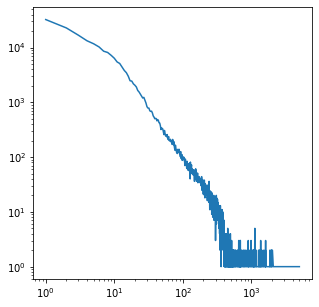

In [11]:
deg, cnt = zip(*degreeCount.items())
# sum_cnt = sum(cnt)
# # print(sum_cnt)
# cnt = np.array(cnt)/sum_cnt
# print(cnt)
fig = plt.figure(figsize =(5,5))
plt.loglog(deg, cnt)

In [27]:
def get_deg_cnt(degreeCount):
    return  zip(*degreeCount.items())

def hist_degree_dist(degrees, title, figsize=(7,7)):
        

    fig = plt.figure(figsize =figsize)
    plt.hist(degrees, weights=np.ones(len(degrees)) / len(degrees))

    plt.title('Histograms of a power law degree distribution {}'.format(title))
    plt.ylabel("fraction of nodes")
    plt.xlabel("Degree")
    # ax.set_xticks([d + 0.4 for d in deg])
    # ax.set_xticklabels(deg)
    plt.show()

def degree_dist(degreeCount, title, figsize=(7,7)):
    deg, cnt = get_deg_cnt(degreeCount)

    # deg = log(deg)
    # cnt = log(cnt)

    fig = plt.figure(figsize =figsize)
    plt.scatter(deg, cnt)

    plt.title("Degree distribution of {}".format(title))
    plt.ylabel("frequency")
    plt.xlabel("Degree")
    # ax.set_xticks([d + 0.4 for d in deg])
    # ax.set_xticklabels(deg)
    plt.show()

def degree_dist_loglog(degreeCount, title, figsize=(7,7), reg=True):
    deg, cnt =  get_deg_cnt(degreeCount)

    deg = math.log(deg)
    cnt = math.log(cnt)

    fig = plt.figure(figsize =(10,10))
    
    plt.scatter(deg, cnt)
    if reg == True:
        title += ' with regression line'
        m, b = np.polyfit(deg, cnt, 1)
        print('m: {}, b: {}'.format(m, b))
    
        plt.plot(deg, m*deg + b, 'red')

    plt.title("Log-log plot Degree distribution of {} ".format(title))
    plt.ylabel("log of frequency")
    plt.xlabel("log of Degree")
    # ax.set_xticks([d + 0.4 for d in deg])
    # ax.set_xticklabels(deg)
    plt.show()

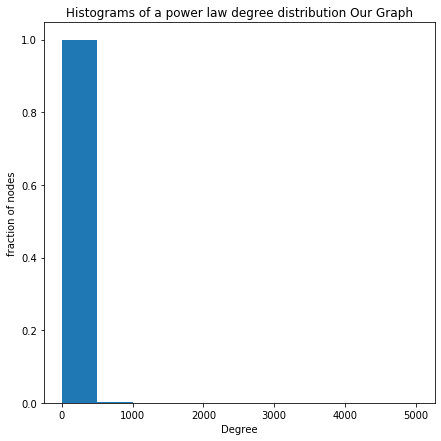

In [28]:
hist_degree_dist(degree_sequence, 'Our Graph')

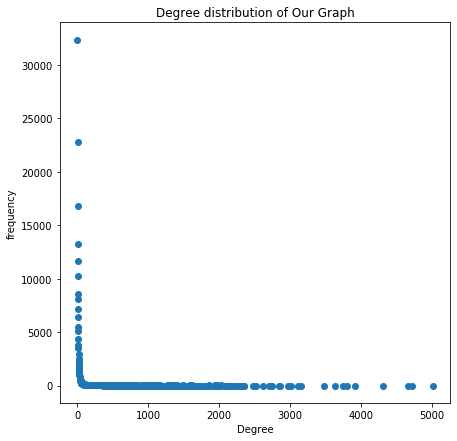

In [29]:
degree_dist(degreeCount, 'Our Graph')

In [30]:
degree_dist_loglog(degreeCount, 'Our Graph')

TypeError: must be real number, not tuple

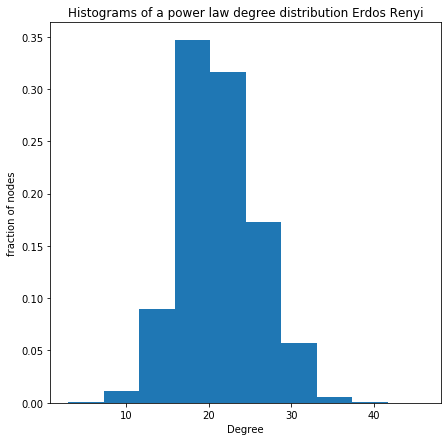

In [31]:
hist_degree_dist(degree_sequence_r, 'Erdos Renyi')

In [ ]:
degree_dist(degreeCount_r, 'Erdos Renyi')

In [ ]:
degree_dist_loglog(degreeCount_r, 'Erdos Renyi', reg=False)

 [https://mathinsight.org/scale_free_network#:~:text=A%20scale%2Dfree%20network%20is,with%20a%20very%20large%20degree.]

In [32]:
arr_deg = np.array([d for n, d in G.degree()])
print(len(arr_deg))

s_deg = sum(arr_deg)
p_deg =  np.array(arr_deg)/s_deg
a = 1.69

args =[a]
stats.kstest(p_deg, 'powerlaw', args=args)
# stats.kstest(degree_sequence, 'powerlaw')
# stats.kstest(deg, 'powerlaw', **kwargs)
# https://www.digitalocean.com/community/tutorials/how-to-use-args-and-kwargs-in-python-3

# stats.ks_1samp(arr_deg, 'powerlaw', args=args)

212557


KstestResult(statistic=0.9999898673050025, pvalue=0.0)

In [40]:
from scipy.stats import powerlaw

# x = np.linspace(-15, 15, 9)
# stats.ks_1samp(x, stats.norm.cdf)
args =[a]
stats.ks_1samp(degree_sequence_r, powerlaw.cdf, args=args)

KstestResult(statistic=1.0, pvalue=0.0)

In [35]:
stats.norm.rvs(size=100)

array([ 0.7745139 , -0.68441351, -1.72555353,  0.42213073, -1.9072002 ,
        0.64328705,  1.05345977,  0.61555549, -0.04962075,  1.88486989,
       -0.89663833,  0.45747921,  1.35510342, -0.731119  , -0.24019831,
        0.07390484,  1.12579759,  0.92511867, -1.0611522 , -0.76055419,
       -0.29492429, -0.35071337, -1.05030549, -0.60802759,  1.40808306,
        3.13997273,  1.16720573, -0.08754285, -0.5146984 ,  1.4772729 ,
        1.23488166, -1.17520817,  0.58496114, -0.99358378,  1.2826352 ,
        0.49388831, -1.93343708, -1.38959578,  2.07268132,  1.20007509,
        0.00746259, -0.61869347,  1.18158101, -2.26779502,  0.27547542,
        1.55679828,  2.52719143,  1.21279182,  1.30716611,  0.90548009,
        0.86245861, -1.94474901, -0.23443964, -1.10121539, -1.31727121,
        0.50943537, -0.39855375, -0.65452293, -0.47384797, -0.68365816,
        0.72345317, -1.27378367,  0.17677094, -0.23343258,  0.77014344,
        0.91639578,  0.05864828,  0.88280869, -0.39376494, -1.11

In [37]:
np.random.seed(987654321) # set random seed to get the same result
stats.ks_1samp(stats.norm.rvs(size=100), stats.norm.cdf)

KstestResult(statistic=0.058352892479417884, pvalue=0.8653960860778898)

In [38]:
y = [ 0.7745139 , -0.68441351, -1.72555353,  0.42213073, -1.9072002 ,
        0.64328705,  1.05345977,  0.61555549, -0.04962075,  1.88486989,
       -0.89663833,  0.45747921,  1.35510342, -0.731119  , -0.24019831,
        0.07390484,  1.12579759,  0.92511867, -1.0611522 , -0.76055419,
       -0.29492429, -0.35071337, -1.05030549, -0.60802759,  1.40808306,
        3.13997273,  1.16720573, -0.08754285, -0.5146984 ,  1.4772729 ,
        1.23488166, -1.17520817,  0.58496114, -0.99358378,  1.2826352 ,
        0.49388831, -1.93343708, -1.38959578,  2.07268132,  1.20007509,
        0.00746259, -0.61869347,  1.18158101, -2.26779502,  0.27547542,
        1.55679828,  2.52719143,  1.21279182,  1.30716611,  0.90548009,
        0.86245861, -1.94474901, -0.23443964, -1.10121539, -1.31727121,
        0.50943537, -0.39855375, -0.65452293, -0.47384797, -0.68365816,
        0.72345317, -1.27378367,  0.17677094, -0.23343258,  0.77014344,
        0.91639578,  0.05864828,  0.88280869, -0.39376494, -1.11598486,
        0.20174595, -1.7397426 , -0.08891878, -0.81306356, -0.60526377,
       -0.19811646,  1.3797059 , -1.02080648,  0.12832743, -0.28112376,
        1.3190093 , -0.54751665,  1.63861751, -0.38934724,  0.01881531,
       -1.51970508,  0.24694764, -0.76051225,  0.2973679 , -0.98676856,
        1.20551916,  0.42374466, -1.67454243,  1.10936788, -0.84582436,
        0.22136507, -1.07597941,  0.0553115 ,  1.59566397, -0.62456814]

stats.ks_1samp(y, stats.norm.cdf)

KstestResult(statistic=0.0863642435609584, pvalue=0.42113883034058064)

In [44]:
import statsmodels.stats.diagnostic as sm
sm.kstest_exponential(degree_sequence_r, dist='norm', pvalmethod = 'table')

(0.05808628664225468, 0.0009999999999998899)

In [45]:
degree_sequence_r

[46,
 46,
 45,
 44,
 44,
 44,
 44,
 43,
 43,
 43,
 43,
 43,
 42,
 42,
 42,
 42,
 42,
 42,
 42,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 41,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,


In [287]:
# x = np.linspace(-15, 15, 212557)
# stats.kstest(x, 'norm')
# from networkx.utils import powerlaw_sequence
# pl_sequence = powerlaw_sequence(1000,exponent=2.5)

# fitted_pl = stats.powerlaw.fit(deg)
# # pl_sequence -> (0.15683325844803264, 1.0002786443332128, 305.631936804142)
# # deg         -> (0.49419414715684246, 0.9999999999999999, 5013.2732850218745)

# fitted_pl
# from pprint import pprint
# pprint ([(i, stats.ks_2samp(deg, deg[:i])[1]) for i in range(200,len(deg),200)])
# np.random.seed(seed=123)
# x = np.random.uniform(low=0, high=1, size=(10000, 1))
# stats.kstest(x.ravel(), 'uniform')
# from scipy import log
# import numpy.random

# alpha = 3
# n = 5000
# x = numpy.random.zipf(alpha, n)
# alpha_hat = 1 + n / sum(log(deg))
# alpha_hat

# from scipy import log
# from scipy.special import zeta
# from scipy.optimize import bisect 
# #https://www.johndcook.com/blog/2015/11/24/estimating-the-exponent-of-discrete-power-law-data/

# xmin = 1

# def log_zeta(x):
#     return log(zeta(x, 1))

# def log_deriv_zeta(x):
#     h = 1e-5
#     return (log_zeta(x+h) - log_zeta(x-h))/(2*h)

# t = -sum( log(x/xmin) )/n
# def objective(x):
#     return log_deriv_zeta(x) - t

# a, b = 1.01, 10
# alpha_hat = bisect(objective, a, b, xtol=1e-6)
# print(alpha_hat)

In [21]:

# stats.kstest(degree_sequence_r, 'norm')
# stats.ks_1samp(arr_deg, 'powerlaw', args=args)

KstestResult(statistic=0.9999950087280204, pvalue=0.0)

In [1]:
import scipy
scipy.__version__

'1.5.0'

In [20]:
scipy.stats.norm.cdf(1.96)

0.9750021048517795